In [1]:
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]

In [3]:
backend = least_busy(IBMQ.backends(simulator=False))
print("The least busy backend is " + backend.name())
simulator = Aer.get_backend('qasm_simulator')

The least busy backend is ibmqx2


In [4]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q, c)

In [5]:
job_exp = execute(qc, backend=backend, shots=1024, max_credits=3)
counts = job_exp.result().get_counts(qc)

In [6]:
print("\nTotal count for IBMQ",counts)


Total count for IBMQ {'100': 97, '011': 27, '000': 562, '110': 37, '111': 9, '101': 13, '001': 44, '010': 235}


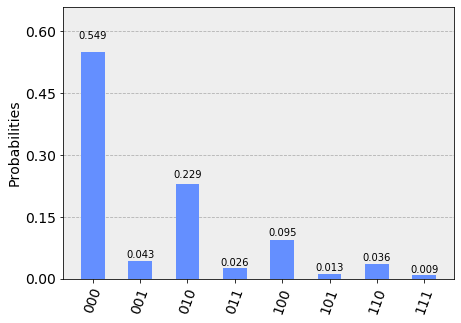

In [7]:
plot_histogram(counts)

In [8]:
job_sim = execute(qc, backend=simulator, shots=1024)
counts_sim = job_sim.result().get_counts(qc)

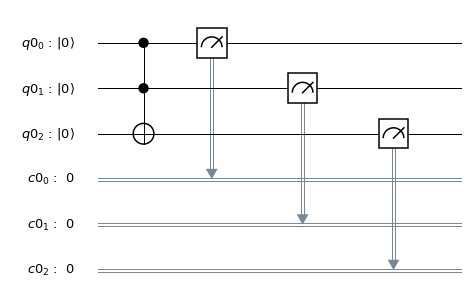

In [9]:
qc.draw(output='mpl')

In [10]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'000': 1024}


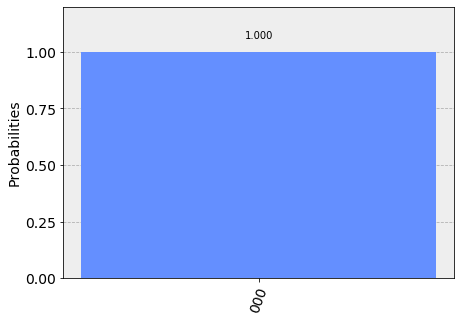

In [11]:
plot_histogram(counts_sim)